In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from bin import utils

fdata = sc.read_h5ad("/home/wpy/stereoseq/20240502-SPACseq/RNA/Multitime.clustered.h5")
gdata = sc.read_h5ad("/home/wpy/stereoseq/20240502-SPACseq/RNA/Multitime.filtered.guide.bin100.h5")

gdata.obs.marker = gdata.obs.marker.map({
    'B926-1': '2-1',
    'B926-2': '2-2',
    'B924-1': '1-1',
    'B924-2': '1-2',
    'B922-1': '3-1',
    'B922-2': '3-2'
})

fdata.obs['coord_x'] = fdata.obsm['spatial'][:, 0] // 100 * 100
fdata.obs['coord_y'] = fdata.obsm['spatial'][:, 1] // 100 * 100

gdata.obs['coord_x'] = gdata.obsm['spatial'][:, 0] // 100 * 100
gdata.obs['coord_y'] = gdata.obsm['spatial'][:, 1] // 100 * 100
fdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(fdata.obs['marker'], fdata.obs['coord_x'], fdata.obs['coord_y'])]
gdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(gdata.obs['marker'], gdata.obs['coord_x'], gdata.obs['coord_y'])]

common_bins = np.intersect1d(fdata.obs_names, gdata.obs_names)
fdata = fdata[common_bins].copy()
gdata = gdata[common_bins].copy()

gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240502-SPACseq/bin/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [138]:
inf_genes = ["Aaas", "Abce1", "Adar", "Arih1", "B2m", "Becn1", "Bst2", "Camk2a", "Camk2b",
             "Camk2d", "Camk2g", "Cd44", "Cdk1", "Cenps", "Cenpx", "Chuk", "Ciita", "Dhx9",
             "Dnajc3", "Dus2", "Egr1", "Eif2ak2", "Eif2s1", "Eif2s2", "Eif2s3", "Eif4a1",
             "Eif4a2", "Eif4a3", "Eif4e", "Eif4e2", "Eif4e3", "Eif4g1", "Eif4g2", "Eif4g3",
             "Faap100", "Faap20", "Faap24", "Fanca", "Fancb", "Fanc", "Fance", "Fancf",
             "Fancg", "Fanc", "Fancm", "Fcgr1a", "Fcgr1bp", "Flna", "Flnb", "Gbp1", "Gbp2",
             "Gbp3", "Gbp4", "Gbp5", "Gbp6", "Gbp7", "Herc5", "Hla-a", "Hla-b", "Hla-c",
             "Hla-dpa1", "Hla-dpb1", "Hla-dqa1", "Hla-dqa2", "Hla-dqb1", "Hla-dqb2", "Hla-dra",
             "Hla-drb1", "Hla-drb3", "Hla-drb4", "Hla-drb5", "Hla-e", "Hla-f", "Hla-g",
             "Hla-h", "Hspa1a", "Hspa1b", "Hspa1l", "Hspa2", "Hspa8", "Icam1", "Ifi27",
             "Ifi30", "Ifi35", "Ifi6", "Ifit1", "Ifit2", "Ifit3", "Ifit5", "Ifitm1", "Ifitm2",
             "Ifitm3", "Ifna1", "Ifna10", "Ifna13", "Ifna14", "Ifna16", "Ifna17", "Ifna2",
             "Ifna21", "Ifna4", "Ifna5", "Ifna6", "Ifna7", "Ifna8", "Ifnar1", "Ifnar2", "Ifnb1",
             "Ifng", "Ifngr1", "Ifngr2", "Ikbkb", "Ikbkg", "Ilf2", "Ilf3", "Ip6k2", "Irf1",
             "Irf2", "Irf3", "Irf4", "Irf5", "Irf6", "Irf7", "Irf8", "Irf9", "Isg15", "Isg20",
             "Jak1", "Jak2", "Kpna1", "Kpna2", "Kpna3", "Kpna4", "Kpna5", "Kpna7", "Kpnb1",
             "Map2k6", "Mapk1", "Mapk3", "Mapt", "Mavs", "Mid1", "Mt2a", "Mx1", "Mx2", "Ncam1",
             "Nck1", "Ndc1", "Nedd4", "Npm1", "Nup107", "Nup133", "Nup153", "Nup155", "Nup160",
             "Nup188", "Nup205", "Nup210", "Nup214", "Nup35", "Nup37", "Nup42", "Nup43",
             "Nup50", "Nup54", "Nup58", "Nup62", "Nup85", "Nup88", "Nup93", "Nup98", "Oas1",
             "Oas2", "Oas3", "Oasl", "Pde12", "Pias1", "Pin1", "Plcg1", "Pml", "Pom121",
             "Pom121c", "Ppm1b", "Ppp2ca", "Ppp2cb", "Ppp2r1a", "Ppp2r1b", "Ppp2r5a", "Prkcd",
             "Prkra", "Psm8", "Ptafr", "Ptpn1", "Ptpn11", "Ptpn2", "Ptpn6", "Rae1", "Raf1",
             "Ranbp2", "Rigi", "Rnase", "Rps27a", "Rsad2", "Samhd1", "Sec13", "Seh1l", "Smad7",
             "Snca", "Socs1", "Socs3", "Sp100", "Sphk1", "Stat1", "Stat2", "Stat3", "Sumo1",
             "Tarbp2", "Tp53", "Tpr", "Trim10", "Trim14", "Trim17", "Trim2", "Trim21", "Trim22",
             "Trim25", "Trim26", "Trim29", "Trim3", "Trim31", "Trim34", "Trim35", "Trim38",
             "Trim45","Trim46", "Trim48", "Trim5", "Trim6", "Trim62", "Trim68", "Trim8", "Tuba1a",
             "Tuba1b", "Tuba1c", "Tuba3c", "Tuba3d", "Tuba3e", "Tuba4a", "Tuba4b", "Tuba8",
             "Tubal3", "Tubb1", "Tubb2a", "Tubb2b", "Tubb3", "Tubb4a", "Tubb4b", "Tubb6", "Tubb8",
             "Tubb8b", "Tyk2", "Uba52", "Uba7", "Ubb", "Ubc", "Ube2e1", "Ube2i", "Ube2l6",
             "Ube2n", "Usp18", "Vcam1", "Xaf1", "Ybx1"]
inf_genes = ["Adar", "Arg1", "Azi2", "Actb", "Cdc37", "Cnot7", "Dcst1", "Eif4e2", "Fadd", "Gigyf2", "Hck", "Hdac4", "Hpx", "Ifi27", "Ifih1", "Ifitm1", "Ifitm2", "Ifitm3", "Ifna1", "Ifna10", "Ifna13", "Ifna14", "Ifna16", "Ifna17", "Ifna2", "Ifna21", "Ifna4", "Ifna5", "Ifna6", "Ifna7", "Ifna8", "Ifnar1", "Ifnar2", "Ifnb1", "Ifne", "Ifng", "Ifngr1", "Ifngr2", "Ifnk", "Ifnl1", "Ifnl2", "Ifnl3", "Ifnl4", "Ifnlr1", "Ifnw1", "Ikbke", "Il10rb", "Irak1", "Irf1", "Irf3", "Irf7", "Irgm", "Isg15", "Jak1", "Jak2", "Lsm14a", "Mavs", "Med1", "Mettl3", "Mir21", "Mmp12", "Mul1", "MyD88", "Nlrc5", "Nr1h2", "Nr1h3", "Oas1", "Oas2", "Oas3", "Otop1", "Parp14", "Parp9", "Pparg", "Ptpn1", "Ptpn11", "Ptpn2", "Ptpn6", "Raf1", "Rbm47", "Rnf185", "Samhd1", "Sin3a", "Smim30", "Sp100", "Stat1", "Stat2", "Stat3", "Sumo1", "Tarbp2", "Trp53", "Tpr", "Trim41", "Trim56", "Trim6", "Trim65", "Ttll12", "Txk", "Tyk2", "Ube2k", "Usp18", "Usp27x", "Usp29", "Wnt5a", "Ythdf2", "Ythdf3", "Zbp1"]
inf_genes = np.intersect1d(inf_genes, fdata.var_names)

In [151]:
pd.DataFrame(p)

,Actb,Adar,Arg1,Cnot7,Dcst1,Fadd,Hck,Hdac4,Hpx,Ifi27,...,Ttll12,Txk,Tyk2,Usp18,Usp27x,Usp29,Wnt5a,Ythdf2,Ythdf3,Zbp1
0,-0.012279,0.003222,0.006293,0.006047,-0.001551,-0.000849,0.005880,-0.001144,0.000151,0.012273,...,-0.006013,0.000678,-0.002587,0.003125,-0.003015,-0.001459,-0.000382,-0.003520,0.001146,0.010864
1,0.000024,0.267823,0.030453,0.037550,0.593707,0.770325,0.043167,0.693988,0.958508,0.000024,...,0.038627,0.815547,0.373613,0.282493,0.299842,0.615830,0.895506,0.226116,0.693379,0.000187


In [163]:
from scipy.stats import pearsonr
from tqdm import tqdm

p = {}
for gene in tqdm(inf_genes):
    p[gene] = pearsonr(fdata[:, gene].X.toarray().flatten(), gdata[:, 'sgCd44'].X.toarray().flatten())[0] -\
        pearsonr(fdata[:, gene].X.toarray().flatten(), gdata[:, 'sgnon-targeting'].X.toarray().flatten())[0]
p = pd.DataFrame(p, index=['pearsonr', 'pvalue']).T
p.sort_values(by='pearsonr', ascending=False, inplace=True)
p.head()

100%|██████████| 60/60 [00:32<00:00,  1.87it/s]


,pearsonr,pvalue
Mmp12,0.012367,0.012367
Usp29,0.011518,0.011518
Rbm47,0.009546,0.009546
Hdac4,0.006934,0.006934
Cnot7,0.006362,0.006362


In [164]:
# sc.tl.score_genes(fdata, inf_genes, score_name='inf_score')
sc.tl.score_genes(fdata, p.head(10).index, score_name='inf_score')
fdata.obs['inf_score'] = fdata.obs['inf_score'].clip(np.quantile(fdata.obs['inf_score'], 0.01), np.quantile(fdata.obs['inf_score'], 0.99))

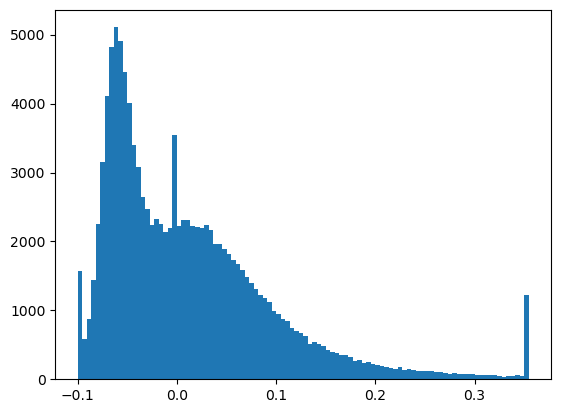

In [165]:
plt.hist(fdata.obs['inf_score'], bins=100)
plt.show()
# plt.yscale('log')

In [166]:
p.head(10).index

Index(['Mmp12', 'Usp29', 'Rbm47', 'Hdac4', 'Cnot7', 'Trim56', 'Trim65', 'Hpx',
       'Pparg', 'Rnf185'],
      dtype='object')

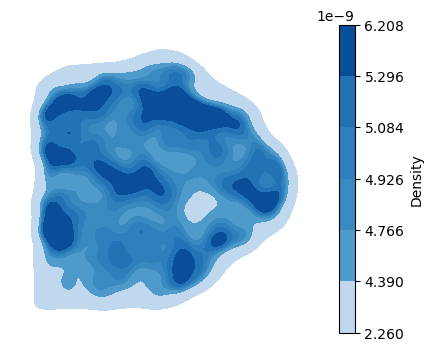

In [167]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '1-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(5, 4))
# plt.gca().set_facecolor('black')
# kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=(plot_data.obs['inf_score'] - plot_data.obs['inf_score'].min()) / (plot_data.obs['inf_score'].max() - plot_data.obs['inf_score'].min()),
# kde_plot = sns.scatterplot(x=x_coords, y=y_coords, s=3, c=plot_data[:, inf_genes].X.toarray().sum(axis=1).flatten(), vmax=70, vmin=10, cmap='Blues', edgecolor='none')
# kde_plot = sns.scatterplot(x=x_coords, y=y_coords, c=plot_data.obs['inf_score'], cmap='Blues', edgecolor='none', s=3, vmax=0.2)
kde_plot = sns.kdeplot(x=x_coords, y=y_coords,
                    #    weights=(plot_data.obs['inf_score'] - plot_data.obs['inf_score'].min()) / (plot_data.obs['inf_score'].max() - plot_data.obs['inf_score'].min()),
                        weights=plot_data[:, p.head(10).index].X.toarray().sum(axis=1).flatten(),
                       cmap='Blues', fill=True, alpha=1, legend=False, bw_adjust=0.6, levels=7)
# gene = 'Irf1'
# kde_plot = sns.scatterplot(x=x_coords, y=y_coords,
#                            s=plot_data[:, gene].X.toarray().flatten().clip(0, 1),
#                            cmap='Blues', edgecolor='none', c=plot_data[:, gene].X.toarray().flatten(), vmax=2)
plt.colorbar(kde_plot.collections[0], label='Density')  # 添加colorbar
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('sgZc3h12a_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [3]:
import pickle
fdata_bin200 = sc.read_h5ad('/home/wpy/stereoseq/20240502-SPACseq/h5_files/Multitime.tissue.bin200.h5')
# fdata = sc.read_h5ad('/home/wpy/stereoseq/20240502-SPACseq/h5_files/Multitime.tissue.h5')
model = pickle.load(open('/home/wpy/stereoseq/20240502-SPACseq/nmf_model.200.pkl', 'rb'))
cnt_matrix_trans = np.load('/home/wpy/stereoseq/20240502-SPACseq/nmf_matrix.200.npy')
corr_matrix = np.load('/home/wpy/stereoseq/20240502-SPACseq/nmf_corr_matrix.200.npy')

In [35]:
cnt_matrix_trans.shape

(30061, 200)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


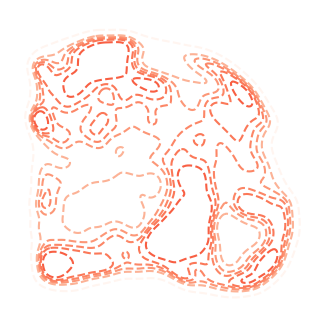

In [19]:
_, ax = plt.subplots(1, 1, figsize=(4, 4))
# reordered_idx = [list(range(133, 133 + 18)), list(range(133 + 18, 133 + 31)), list(range(133 + 31, 133 + 46)), list(range(133 + 46, 133 + 55)), list(range(133 + 59, 133 + 63)), list(range(133 + 63, 133 + 67))]
reordered_nmf = cnt_matrix_trans[:, :]

sample = 'B926-1'
sample_idx = np.where(fdata_bin200.obs['marker'].values == f'{sample}')[0]

sns.kdeplot(x=fdata_bin200[sample_idx].obsm['spatial'][:, 0],
            y=fdata_bin200[sample_idx].obsm['spatial'][:, 1],
            weights=cnt_matrix_trans[fdata_bin200.obs['marker'] == sample, 133:147].mean(axis=1).clip(0, 0.1),
            cmap='Reds', fill=False, edgecolor='none', levels=7, bw_adjust=0.5, ax=ax, linestyles='dashed')
ax.invert_yaxis()
sns.despine(left=True, bottom=True, right=True, top=True)
# ax[0].set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


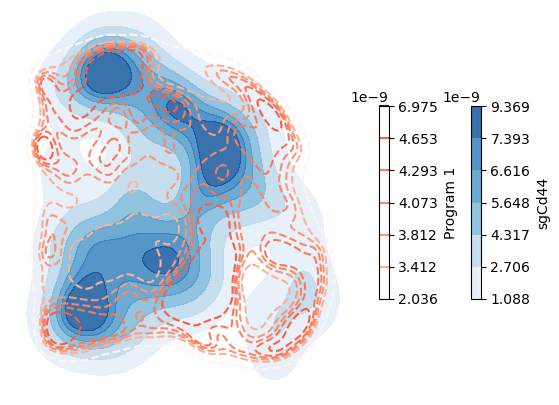

In [20]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '2-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(7, 5))
# plt.gca().set_facecolor('black')
kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(),
                        cmap='Blues', fill=True, legend=False, bw_adjust=0.6, levels=7, alpha=0.8)
plt.colorbar(kde_plot.collections[0], label='sgCd44', shrink=0.5)
kde_plot = sns.kdeplot(x=fdata_bin200[sample_idx].obsm['spatial'][:, 0],
                    y=fdata_bin200[sample_idx].obsm['spatial'][:, 1],
                    weights=cnt_matrix_trans[fdata_bin200.obs['marker'] == sample, 133:147].mean(axis=1).clip(0, 0.1),
                    cmap='Reds', fill=False, edgecolor='none', levels=7, bw_adjust=0.5, linestyles='dashed')
# ax[0].invert_yaxis()
plt.colorbar(kde_plot.collections[1], label='Program 1', shrink=0.5)
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

plt.gca().invert_yaxis()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('sgCd44_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


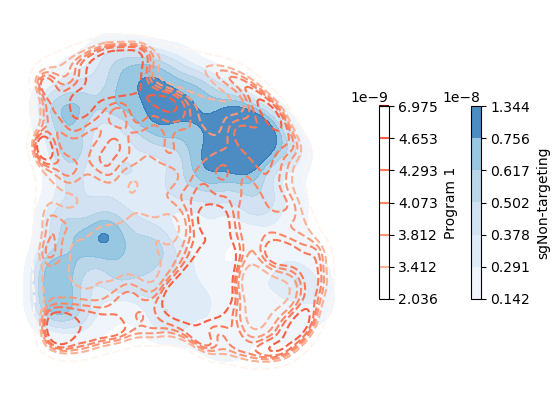

In [21]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '2-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(7, 5))
# plt.gca().set_facecolor('black')
kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(),
                        cmap='Blues', fill=True, legend=False, bw_adjust=0.6, levels=7, alpha=0.8)
plt.colorbar(kde_plot.collections[0], label='sgNon-targeting', shrink=0.5)
kde_plot = sns.kdeplot(x=fdata_bin200[sample_idx].obsm['spatial'][:, 0],
                    y=fdata_bin200[sample_idx].obsm['spatial'][:, 1],
                    weights=cnt_matrix_trans[fdata_bin200.obs['marker'] == sample, 133:147].mean(axis=1).clip(0, 0.1),
                    cmap='Reds', fill=False, edgecolor='none', levels=7, bw_adjust=0.5, linestyles='dashed')
# ax[0].invert_yaxis()
plt.colorbar(kde_plot.collections[1], label='Program 1', shrink=0.5)
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

plt.gca().invert_yaxis()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('sgNTC_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


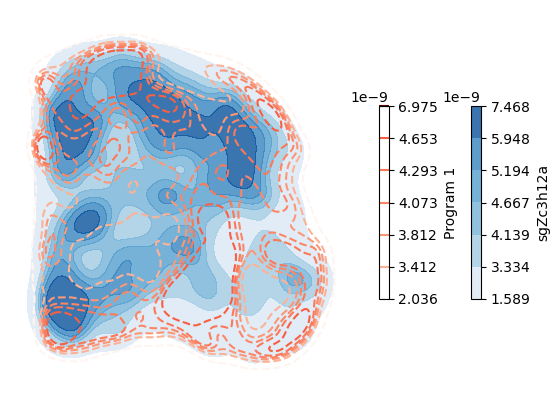

In [22]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '2-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(7, 5))
# plt.gca().set_facecolor('black')
kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=plot_guide_data[:, 'sgZc3h12a'].X.toarray().flatten(),
                        cmap='Blues', fill=True, legend=False, bw_adjust=0.6, levels=7, alpha=0.8)
plt.colorbar(kde_plot.collections[0], label='sgZc3h12a', shrink=0.5)
kde_plot = sns.kdeplot(x=fdata_bin200[sample_idx].obsm['spatial'][:, 0],
                    y=fdata_bin200[sample_idx].obsm['spatial'][:, 1],
                    weights=cnt_matrix_trans[fdata_bin200.obs['marker'] == sample, 133:147].mean(axis=1).clip(0, 0.1),
                    cmap='Reds', fill=False, edgecolor='none', levels=7, bw_adjust=0.5, linestyles='dashed')
# ax[0].invert_yaxis()
plt.colorbar(kde_plot.collections[1], label='Program 1', shrink=0.5)
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

plt.gca().invert_yaxis()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('sgZc3h12a_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [3]:
T_marker = {
    "memory T": ["Il7r", "Cd27", 'Ccr4','Eomes','Gpr183'],
    "effector T": ['Cd69','Ifng',"Gzmk", "Gzma", "Gzmb", "Prf1", "Nkg7"],
    "exhausted T": ["Lag3", "Pdcd1", "Tigit", "Ctla4", 'Tox', 'Tnfrsf9','Tnfrsf18',  'Cxcr6', 'Cxcl13'],
    "stem-like T": ["Tcf7", "Foxo1"]
}
for marker in T_marker:
    sc.tl.score_genes(fdata, T_marker[marker], score_name=marker)
    fdata.obs[marker] = fdata.obs[marker].map(lambda x: 1 if x > 0 else 0)

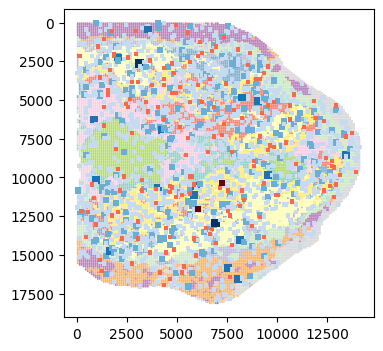

In [19]:
SAMPLE = '1-1'
region = [[0, 20000], [0, 20000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(4, 4))
sns.scatterplot(x=x_coords, y=y_coords, s=2, hue=plot_data.obs.cluster_cellcharter_givenk, palette='Set3', alpha=1, legend=False, edgecolor='none', marker='o')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(), palette='Blues', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Reds', alpha=1, legend=False, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=['sgnon-targeting']*plot_guide_data.shape[0], palette='Blues', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=['sgCd44']*plot_guide_data.shape[0], palette='Reds', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Reds', alpha=1, edgecolor='none', marker='s', label='sgCd44', legend=False)
# plt.legend(loc='upper right')
plt.gca().invert_yaxis()
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
sns.despine(left=False, bottom=False, right=False, top=False)

plt.show()

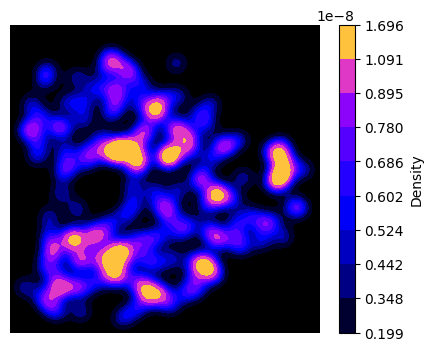

In [7]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '1-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(5, 4))
plt.gca().set_facecolor('black')
kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(),
                        cmap='gnuplot2', fill=True, alpha=1, legend=False, bw_adjust=0.3)
plt.colorbar(kde_plot.collections[0], label='Density')  # 添加colorbar
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('cd44_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [10]:
plot_guide_data[:, 'sgnon-targeting'].X.toarray().sum()

2011

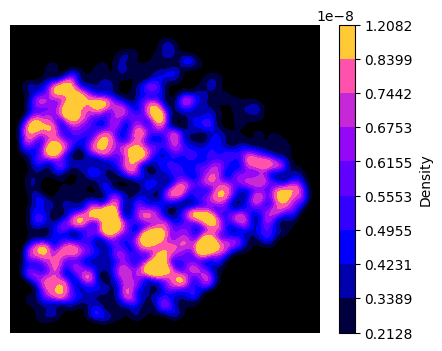

In [8]:
region = [[0, 20000], [0, 20000]]
SAMPLE = '1-1'
plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(5, 4))
plt.gca().set_facecolor('black')
kde_plot = sns.kdeplot(x=x_coords, y=y_coords, weights=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(),
                        cmap='gnuplot2', fill=True, alpha=1, legend=False, bw_adjust=0.3)
plt.colorbar(kde_plot.collections[0], label='Density')  # 添加colorbar
sns.despine(left=True, bottom=True, right=True, top=True)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('non_targeting_guide_density.pdf', bbox_inches='tight', format='pdf')
plt.show()

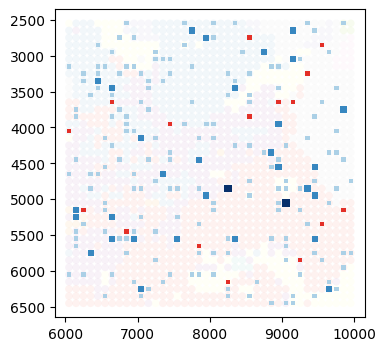

In [31]:
SAMPLE = '1-1'
region = [[6000, 10000], [2500, 6500]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(4, 4))
sns.scatterplot(x=x_coords, y=y_coords, s=30, hue=plot_data.obs.cluster_cellcharter_givenk, palette='Set3', alpha=0.1, legend=False, edgecolor='none', marker='o')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(), palette='Blues', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Reds', alpha=1, legend=False, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=['sgnon-targeting']*plot_guide_data.shape[0], palette='Blues', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=['sgCd44']*plot_guide_data.shape[0], palette='Reds', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Reds', alpha=1, edgecolor='none', marker='s', label='sgCd44', legend=False)
# plt.legend(loc='upper right')
plt.gca().invert_yaxis()
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
sns.despine(left=False, bottom=False, right=False, top=False)
plt.show()

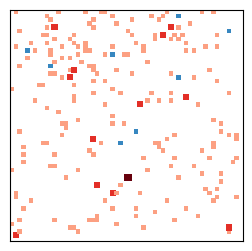

In [179]:
SAMPLE = '2-1'
region = [[2000, 8000], [6000, 12000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(3, 3))
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Blues', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(), palette='Reds', alpha=1, legend=False, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=[0 if x < 0 else x * 20 for x in plot_data.obs['exhausted T'] - plot_data.obs['effector T']], color='orange', marker='s', alpha=1, legend=False)
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=['sgnon-targeting']*plot_guide_data.shape[0], palette='Blues', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=['sgCd44']*plot_guide_data.shape[0], palette='Reds', alpha=0, edgecolor='none', marker='s')
# sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Reds', alpha=1, edgecolor='none', marker='s', label='sgCd44', legend=False)
# plt.legend(loc='upper right')
plt.gca().invert_yaxis()
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlim(region[0])
plt.ylim(region[1])
sns.despine(left=False, bottom=False, right=False, top=False)
plt.show()

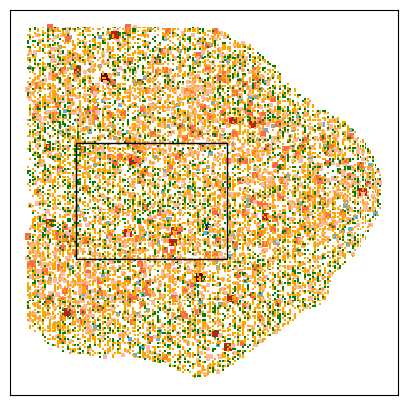

In [54]:
SAMPLE = '1-1'
region = [[0000, 20000], [000, 20000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgCd44'].X.toarray().flatten(), palette='Blues', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, hue=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten(), palette='Reds', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=[0 if x < 0 else x * 2 for x in plot_data.obs['effector T'] - plot_data.obs['exhausted T']], color='orange', marker='s', alpha=1, legend=False)
sns.scatterplot(x=x_coords, y=y_coords, s=[0 if x < 0 else x * 2 for x in plot_data.obs['exhausted T'] - plot_data.obs['effector T']], color='green', marker='s', alpha=1, legend=False)
plt.gca().add_patch(plt.Rectangle((2000, 6000), 6000, 6000, fill=None, edgecolor='black', linewidth=1))

plt.gca().invert_yaxis()
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
# plt.xlim(region[0])
# plt.ylim(region[1])
sns.despine(left=False, bottom=False, right=False, top=False)
plt.show()

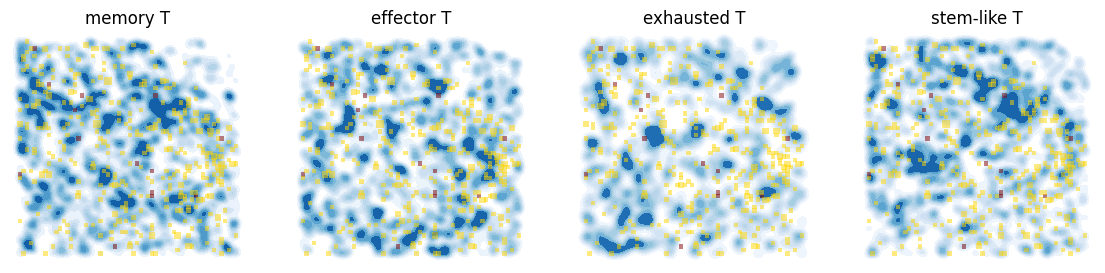

In [36]:
SAMPLE = '2-1'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
_, ax = plt.subplots(1, 4, figsize=(14, 3))
for i, marker in enumerate(T_marker.keys()):
    weights = plot_data.obs[marker].tolist()
    if marker == 'exhausted T':
        weights = plot_data.obs['exhausted T'] - plot_data.obs['effector T']
    elif marker == 'effector T':
        weights = plot_data.obs['effector T'] - plot_data.obs['exhausted T']
    weights = [0 if x < 0 else x for x in weights]
    sns.kdeplot(x=x_coords, y=y_coords, weights=weights, cmap='Blues', fill=True, alpha=1, legend=False, ax=ax[i], bw_adjust=0.2)
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10,
                    color='maroon', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10,
                    color='gold', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])

    ax[i].invert_yaxis()
    ax[i].set_title(marker)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    sns.despine(left=True, bottom=True, right=True, top=True, ax=ax[i])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('guide_density_with_marker_1.pdf', bbox_inches='tight', format='pdf')
plt.show()

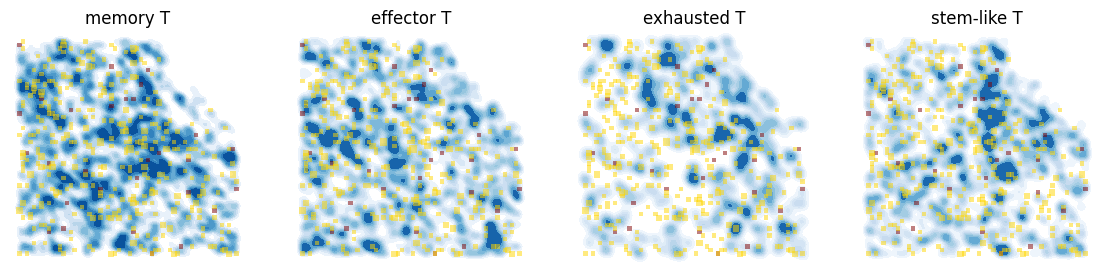

In [59]:
SAMPLE = '1-1'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
_, ax = plt.subplots(1, 4, figsize=(14, 3))
for i, marker in enumerate(T_marker.keys()):
    weights = plot_data.obs[marker].tolist()
    if marker == 'exhausted T':
        weights = plot_data.obs['exhausted T'] - plot_data.obs['effector T']
    elif marker == 'effector T':
        weights = plot_data.obs['effector T'] - plot_data.obs['exhausted T']
    weights = [0 if x < 0 else x for x in weights]
    sns.kdeplot(x=x_coords, y=y_coords, weights=weights, cmap='Blues', fill=True, alpha=1, legend=False, ax=ax[i], bw_adjust=0.2)
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10,
                    color='maroon', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10,
                    color='gold', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])

    ax[i].invert_yaxis()
    ax[i].set_title(marker)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    sns.despine(left=True, bottom=True, right=True, top=True, ax=ax[i])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('guide_density_with_marker_2.pdf', bbox_inches='tight', format='pdf')
plt.show()

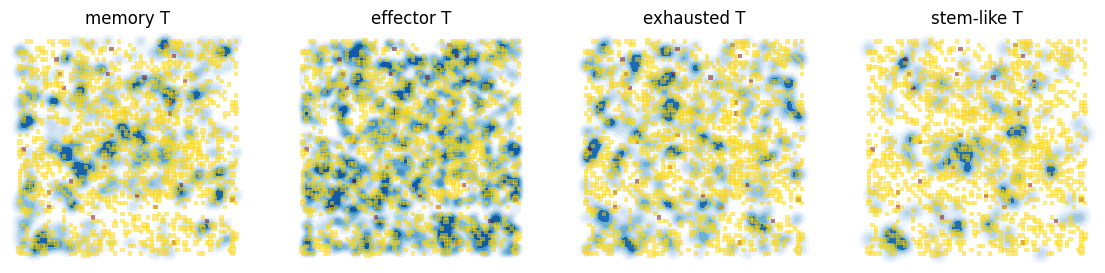

In [60]:
SAMPLE = '1-2'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
_, ax = plt.subplots(1, 4, figsize=(14, 3))
for i, marker in enumerate(T_marker.keys()):
    weights = plot_data.obs[marker].tolist()
    if marker == 'exhausted T':
        weights = plot_data.obs['exhausted T'] - plot_data.obs['effector T']
    elif marker == 'effector T':
        weights = plot_data.obs['effector T'] - plot_data.obs['exhausted T']
    weights = [0 if x < 0 else x for x in weights]
    sns.kdeplot(x=x_coords, y=y_coords, weights=weights, cmap='Blues', fill=True, alpha=1, legend=False, ax=ax[i], bw_adjust=0.2)
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10,
                    color='maroon', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])
    sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10,
                    color='gold', alpha=0.5, legend=False, edgecolor='none', marker='s', ax=ax[i])

    ax[i].invert_yaxis()
    ax[i].set_title(marker)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    sns.despine(left=True, bottom=True, right=True, top=True, ax=ax[i])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('guide_density_with_marker_3.pdf', bbox_inches='tight', format='pdf')
plt.show()

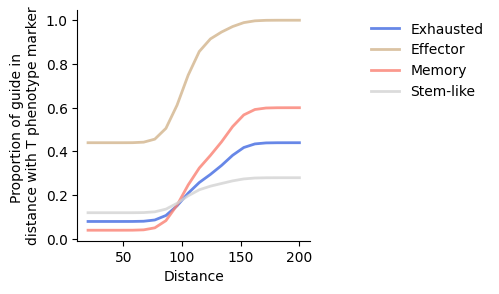

In [61]:
from scipy.spatial import distance_matrix
from scipy.stats import chi2_contingency
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

SAMPLE = '1-2'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

exhausted_bins = plot_data.obs_names[plot_data.obs['exhausted T'] - plot_data.obs['effector T'] > 0]
exhausted_coords = plot_data[exhausted_bins].obsm['spatial']
effector_bins = plot_data.obs_names[-plot_data.obs['exhausted T'] + plot_data.obs['effector T'] > 0]
effector_coords = plot_data[effector_bins].obsm['spatial']
memory_bins = plot_data.obs_names[plot_data.obs['memory T'] > 0]
memory_coords = plot_data[memory_bins].obsm['spatial']
stem_bins = plot_data.obs_names[plot_data.obs['stem-like T'] > 0]
stem_coords = plot_data[stem_bins].obsm['spatial']

ntc_coords = plot_guide_data[plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0, :].obsm['spatial']
cd44_coords = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :].obsm['spatial']

dm_exhausted = distance_matrix(exhausted_coords, cd44_coords)
dm_effector = distance_matrix(effector_coords, cd44_coords)
dm_memory = distance_matrix(memory_coords, cd44_coords)
dm_stem = distance_matrix(stem_coords, cd44_coords)

exhausted_proportions = []
effector_proportions = []
memory_proportions = []
stem_proportions = []

# iter threshold
for threshold in np.linspace(20, 200, 20):

    in_cnt = [(dm_exhausted.min(axis=0) < threshold).sum(), (dm_effector.min(axis=0) < threshold).sum(), (dm_memory.min(axis=0) < threshold).sum(), (dm_stem.min(axis=0) < threshold).sum()]
    out_cnt = [(dm_exhausted.min(axis=0) >= threshold).sum(), (dm_effector.min(axis=0) >= threshold).sum(), (dm_memory.min(axis=0) >= threshold).sum(), (dm_stem.min(axis=0) >= threshold).sum()]

    proportion_exhausted = in_cnt[0] / (in_cnt[0] + out_cnt[0])
    exhausted_proportions.append(proportion_exhausted)
    proportion_effector = in_cnt[1] / (in_cnt[1] + out_cnt[1])
    effector_proportions.append(proportion_effector)
    proportion_memory = in_cnt[2] / (in_cnt[2] + out_cnt[2])
    memory_proportions.append(proportion_memory)
    proportion_stem = in_cnt[3] / (in_cnt[3] + out_cnt[3])
    stem_proportions.append(proportion_stem)

from scipy.ndimage import gaussian_filter1d

x_smooth = np.linspace(20, 200, 20)
guide_proportions_smooth_exhausted = gaussian_filter1d(exhausted_proportions, sigma=1.4)
guide_proportions_smooth_effector = gaussian_filter1d(effector_proportions, sigma=1.4)
guide_proportions_smooth_memory = gaussian_filter1d(memory_proportions, sigma=1.4)
guide_proportions_smooth_stem = gaussian_filter1d(stem_proportions, sigma=1.4)

# 绘制图形
plt.figure(figsize=(3, 3))
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_exhausted, errorbar='sd', linewidth=2, color='royalblue', label='Exhausted', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_effector, errorbar='sd', linewidth=2, color='tan', label='Effector', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_memory, errorbar='sd', linewidth=2, color='salmon', label='Memory', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_stem, errorbar='sd', linewidth=2, color='lightgray', label='Stem-like', alpha=0.8)
plt.xlabel('Distance')
plt.ylabel('Proportion of guide in \ndistance with T phenotype marker')

plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.8, 1))

sns.despine()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('guide_density_with_marker_lineplot_3.pdf', bbox_inches='tight', format='pdf')
plt.show()


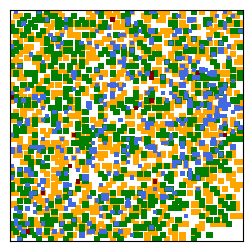

In [34]:
SAMPLE = '2-1'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

# plot_data = plot_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
# plot_guide_data = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :]
x_coords = plot_data.obsm['spatial'][:, 0]
y_coords = plot_data.obsm['spatial'][:, 1]
plt.figure(figsize=(3, 3))
sns.scatterplot(x=x_coords, y=y_coords, s=[0 if x < 0 else x * 20 for x in -plot_data.obs['exhausted T'] + plot_data.obs['effector T']], color='orange', marker='s', alpha=1, legend=False)
sns.scatterplot(x=x_coords, y=y_coords, s=[0 if x < 0 else x * 20 for x in plot_data.obs['exhausted T'] - plot_data.obs['effector T']], color='green', marker='s', alpha=1, legend=False)
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgCd44'].X.toarray().flatten()*10, color='maroon', alpha=1, legend=False, edgecolor='none', marker='s')
sns.scatterplot(x=x_coords, y=y_coords, s=plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten()*10, color='royalblue', alpha=1, legend=False, edgecolor='none', marker='s')
# plt.legend(loc='upper right')
plt.gca().invert_yaxis()
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlim(region[0])
plt.ylim(region[1])
sns.despine(left=False, bottom=False, right=False, top=False)
plt.show()

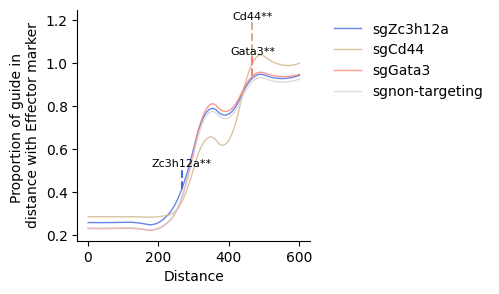

In [41]:
from scipy.spatial import distance_matrix
from scipy.stats import chi2_contingency
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

SAMPLE = '2-1'
region = [[6000, 12000], [2000, 8000]]

plot_data = fdata[(fdata.obs['marker'] == SAMPLE) & (fdata.obsm['spatial'][:, 0] >= region[0][0]) & (fdata.obsm['spatial'][:, 0] <= region[0][1]) & (fdata.obsm['spatial'][:, 1] >= region[1][0]) & (fdata.obsm['spatial'][:, 1] <= region[1][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == SAMPLE) & (gdata.obsm['spatial'][:, 0] >= region[0][0]) & (gdata.obsm['spatial'][:, 0] <= region[0][1]) & (gdata.obsm['spatial'][:, 1] >= region[1][0]) & (gdata.obsm['spatial'][:, 1] <= region[1][1])]

exhausted_bins = plot_data.obs_names[-plot_data.obs['exhausted T'] + plot_data.obs['effector T'] > 0]
exhausted_coords = plot_data[exhausted_bins].obsm['spatial']

gata3_coords = plot_guide_data[plot_guide_data[:, 'sgGata3'].X.toarray().flatten() > 0, :].obsm['spatial']
zc3h12a_coords = plot_guide_data[plot_guide_data[:, 'sgZc3h12a'].X.toarray().flatten() > 0, :].obsm['spatial']
cd44_coords = plot_guide_data[plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0, :].obsm['spatial']
ntc_coords = plot_guide_data[plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0, :].obsm['spatial']

dm_gata3 = distance_matrix(exhausted_coords, gata3_coords)
dm_zc3h12a = distance_matrix(exhausted_coords, zc3h12a_coords)
dm_cd44 = distance_matrix(exhausted_coords, cd44_coords)
dm_ntc = distance_matrix(exhausted_coords, ntc_coords)

zc3h12a_proportions = []
cd44_proportions = []
gata3_proportions = []
ntc_proportions = []
p_value_zc3h12a = []
p_value_cd44 = []
p_value_gata3 = []

# iter threshold
for threshold in np.linspace(20, 200, 10):
    in_cnt = [(dm_zc3h12a.min(axis=0) < threshold).sum(), (dm_ntc.min(axis=0) < threshold).sum()]
    out_cnt = [(dm_zc3h12a.min(axis=0) >= threshold).sum(), (dm_ntc.min(axis=0) >= threshold).sum()]

    _, p, _, _ = chi2_contingency([in_cnt, out_cnt])
    p_value_zc3h12a.append(p)
    proportion_zc3h12a = in_cnt[0] / (in_cnt[0] + out_cnt[0])
    zc3h12a_proportions.append(proportion_zc3h12a)

    in_cnt = [(dm_cd44.min(axis=0) < threshold).sum(), (dm_ntc.min(axis=0) < threshold).sum()]
    out_cnt = [(dm_cd44.min(axis=0) >= threshold).sum(), (dm_ntc.min(axis=0) >= threshold).sum()]

    _, p, _, _ = chi2_contingency([in_cnt, out_cnt])
    p_value_cd44.append(p)
    proportion_cd44 = in_cnt[0] / (in_cnt[0] + out_cnt[0])
    cd44_proportions.append(proportion_cd44)

    in_cnt = [(dm_gata3.min(axis=0) < threshold).sum(), (dm_ntc.min(axis=0) < threshold).sum()]
    out_cnt = [(dm_gata3.min(axis=0) >= threshold).sum(), (dm_ntc.min(axis=0) >= threshold).sum()]

    _, p, _, _ = chi2_contingency([in_cnt, out_cnt])
    p_value_gata3.append(p)
    proportion_gata3 = in_cnt[0] / (in_cnt[0] + out_cnt[0])
    gata3_proportions.append(proportion_gata3)

    proportion_ntc = in_cnt[1] / (in_cnt[1] + out_cnt[1])
    ntc_proportions.append(proportion_ntc)

# 使用make_interp_spline进行曲线拟合
x_smooth = np.linspace(1, 600, 300)
spl_gata3 = make_interp_spline(np.linspace(1, 600, 10), gata3_proportions, k=2)  # k为样条的阶数
spl_zc3h12a = make_interp_spline(np.linspace(1, 600, 10), zc3h12a_proportions, k=2)  # k为样条的阶数
spl_cd44 = make_interp_spline(np.linspace(1, 600, 10), cd44_proportions, k=2)  # k为样条的阶数
spl_ntc = make_interp_spline(np.linspace(1, 600, 10), ntc_proportions, k=2)  # k为样条的阶数
guide_proportions_smooth_zc3h12a = spl_zc3h12a(x_smooth)
guide_proportions_smooth_cd44 = spl_cd44(x_smooth)
guide_proportions_smooth_gata3 = spl_gata3(x_smooth)
guide_proportions_smooth_ntc = spl_ntc(x_smooth)

# 绘制图形
plt.figure(figsize=(3, 3))
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_zc3h12a, errorbar='sd', linewidth=1, color='royalblue', label='sgZc3h12a', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_cd44, errorbar='sd', linewidth=1, color='tan', label='sgCd44', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_gata3, errorbar='sd', linewidth=1, color='salmon', label='sgGata3', alpha=0.8)
sns.lineplot(x=x_smooth, y=guide_proportions_smooth_ntc, errorbar='sd', linewidth=1, color='lightgray', label='sgnon-targeting', alpha=0.8)
plt.xlabel('Distance')
plt.ylabel('Proportion of guide in \ndistance with Effector marker')

plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.8, 1))

# 在每个threshold标注卡方检验的结果
plt.text(x=np.linspace(1, 600, 10)[np.array(p_value_zc3h12a).argmin()], ha='center', y=np.array(zc3h12a_proportions)[np.array(p_value_zc3h12a).argmin()] + 0.1, s='Zc3h12a**', fontsize=8)
plt.vlines(x=np.linspace(1, 600, 10)[np.array(p_value_zc3h12a).argmin()], ymin=np.array(zc3h12a_proportions)[np.array(p_value_zc3h12a).argmin()], ymax=np.array(zc3h12a_proportions)[np.array(p_value_zc3h12a).argmin()] + 0.1, color='royalblue', linestyle='--')
plt.text(x=np.linspace(1, 600, 10)[np.array(p_value_cd44).argmin()], ha='center', y=np.array(cd44_proportions)[np.array(p_value_cd44).argmin()] + 0.2, s='Cd44**', fontsize=8)
plt.vlines(x=np.linspace(1, 600, 10)[np.array(p_value_cd44).argmin()], ymin=np.array(cd44_proportions)[np.array(p_value_cd44).argmin()], ymax=np.array(cd44_proportions)[np.array(p_value_cd44).argmin()] + 0.2, color='tan', linestyle='--')
plt.text(x=np.linspace(1, 600, 10)[np.array(p_value_gata3).argmin()], ha='center', y=np.array(gata3_proportions)[np.array(p_value_gata3).argmin()] + 0.1, s='Gata3**', fontsize=8)
plt.vlines(x=np.linspace(1, 600, 10)[np.array(p_value_gata3).argmin()], ymin=np.array(gata3_proportions)[np.array(p_value_gata3).argmin()], ymax=np.array(gata3_proportions)[np.array(p_value_gata3).argmin()] + 0.1, color='salmon', linestyle='--')

sns.despine()
plt.show()


In [193]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# 计算距离
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# 获取exhausted T > 0的点
exhausted_points = plot_data[plot_data.obs['exhausted T'] - plot_data.obs['effector T'] > 0]
distances = np.linspace(0, 100, num=20)
proportions = []

for distance in distances:
    within_range = 0
    outside_range = 0
    
    for idx, row in exhausted_points.iterrows():
        x, y = row.obsm['spatial']
        dist = calculate_distance(x, y, x_coords, y_coords)
        
        if np.any(dist < distance):
            within_range += np.sum(plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0) + \
                            np.sum(plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0)
        else:
            outside_range += np.sum(plot_guide_data[:, 'sgCd44'].X.toarray().flatten() > 0) + \
                             np.sum(plot_guide_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0)

    total_within = within_range
    total_outside = outside_range
    proportions.append(total_within / (total_within + total_outside) if (total_within + total_outside) > 0 else 0)

# 卡方检验
chi2, p_value = stats.chisquare(f_obs=[total_within, total_outside])

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(distances, proportions, marker='o')
plt.title('Proportion of sgCd44 and sgnon-targeting within distance')
plt.xlabel('Distance')
plt.ylabel('Proportion')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (p=0.05)')
plt.text(50, 0.1, f'Chi2: {chi2:.2f}, p-value: {p_value:.4f}', fontsize=12)
plt.legend()
plt.grid()
plt.show()


AttributeError: 'AnnData' object has no attribute 'iterrows'